# A5. Suposição de normalidade

* A suposição de que os resíduos são normalmente distribuídos não é necessária para calcular as estimativas dos parâmetros da regressão. A normalidade é necessária apenas para testes de significância e a construção de intervalos de confiança dos parâmetros. Os testes $t$ e o qui-quadrado, vinculados às somas de quadrados, são seriamente afetados. O teste $F$ é geralmente considerado como sendo razoavelmente robusto contra a não normalidade.

* No entanto, em algumas situações, não é apropriado presumir a normalidade. Em cenários com dados de contagem resulta mais conveniente o uso de distribuições discretas, por exemplo: uma distribuição Poisson ou mesmo binomial. Em outros cenários resultará apropriado considerar distribuições assimétricas;

# A5. Suposição de normalidade

* O teorema de Gauss-Markov garante que a ausência de normalidade não afeta a qualidade dos estimados de MQO, i.e., os estimadores de MQO são os melhores estimadores lineares não-viesadas e de mínima variância, se as outras suposições forem garantidas.

# O que acontece na ausência de normalidade?

In [33]:
#rm(list=ls())
suppressMessages(if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org"))                                 
suppressMessages(if(!require(stargazer)) install.packages("stargazer", repos = "http://cran.us.r-project.org"))                                 
suppressMessages(if(!require(car)) install.packages("car", repos = "http://cran.us.r-project.org"))
suppressMessages(if(!require(olsrr)) install.packages("olsrr", repos = "http://cran.us.r-project.org"))
suppressMessages(if(!require(lmtest)) install.packages("lmtest", repos = "http://cran.us.r-project.org"))
suppressMessages(if(!require(sandwich)) install.packages("sandwich", repos = "http://cran.us.r-project.org"))               
suppressMessages(if(!require(hcci)) install.packages("hcci", repos = "http://cran.us.r-project.org"))                                 


Call:
lm(formula = y ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-3.605 -1.912 -0.763  1.266  7.481 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.5709     0.8089   8.123 1.38e-12 ***
x             5.0742     0.2488  20.392  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 98 degrees of freedom
Multiple R-squared:  0.8093,	Adjusted R-squared:  0.8073 
F-statistic: 415.8 on 1 and 98 DF,  p-value: < 2.2e-16


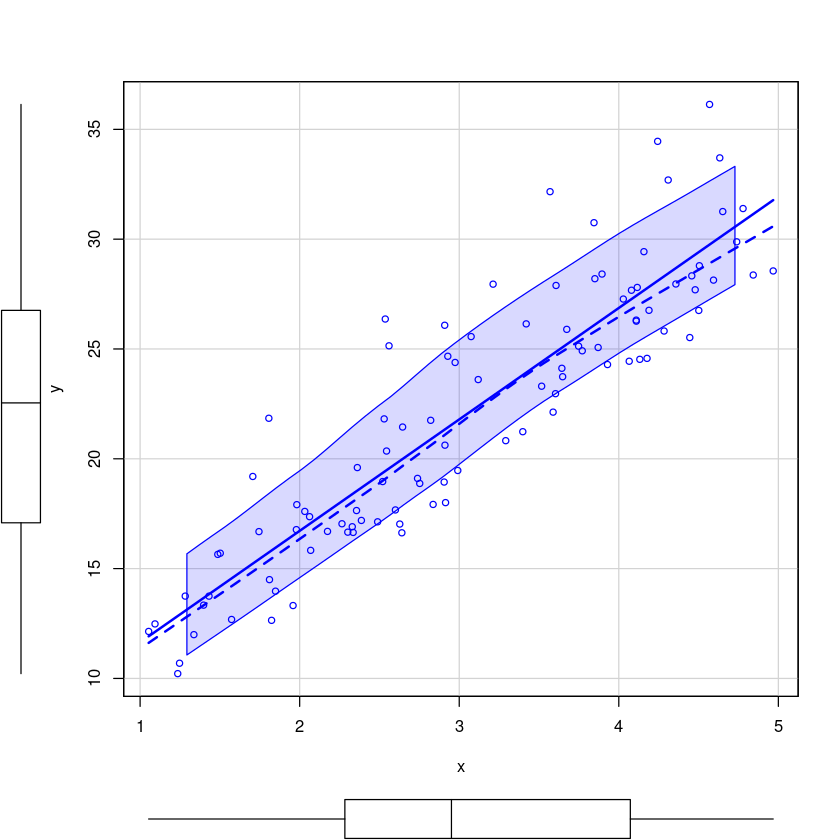

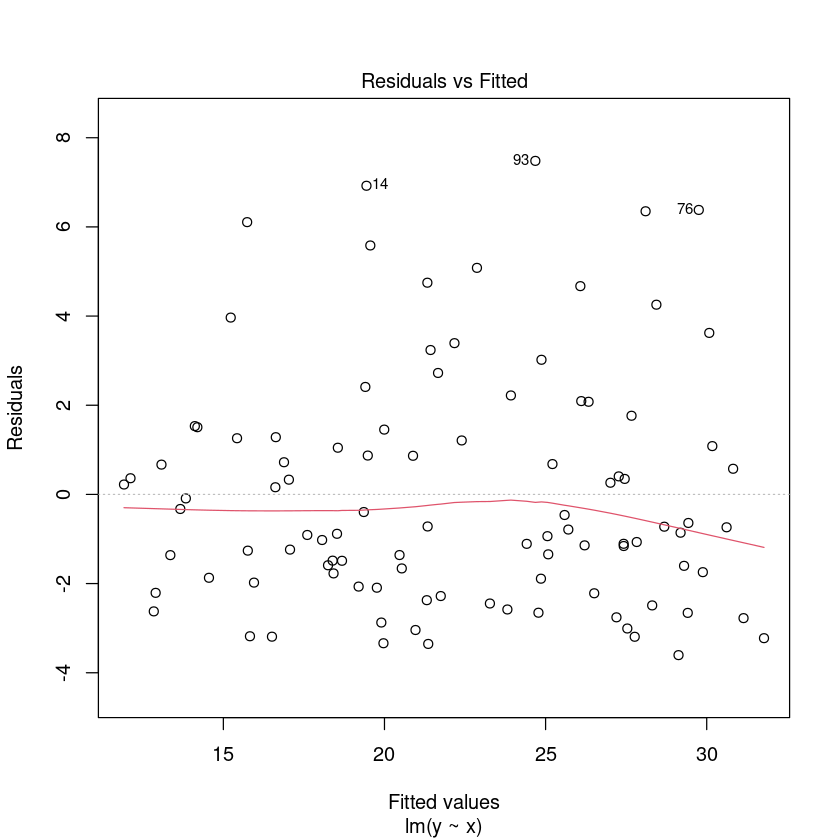

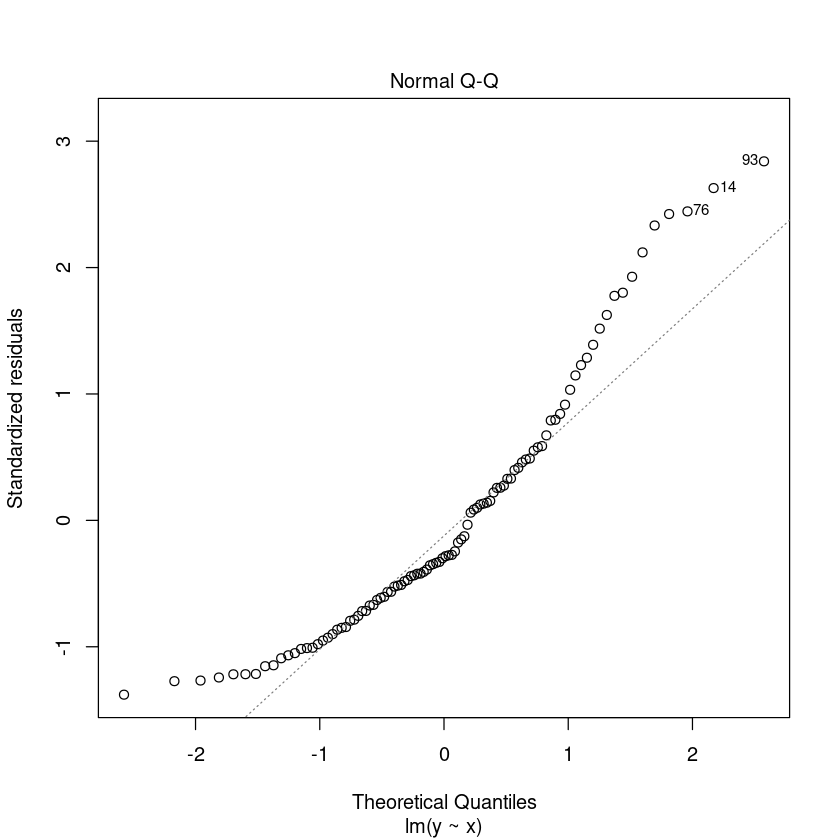

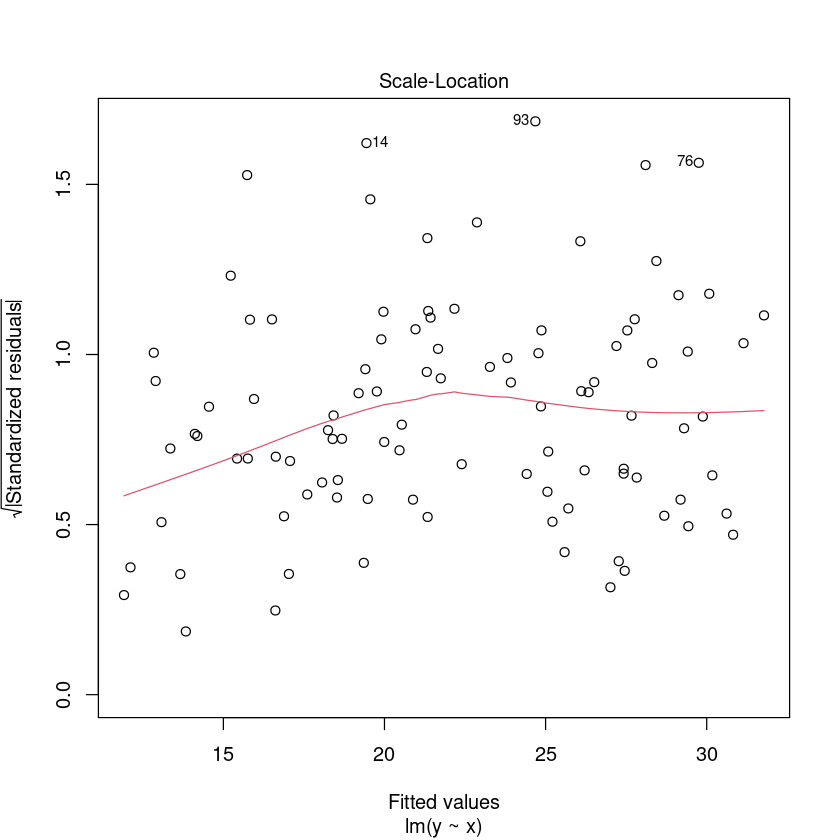

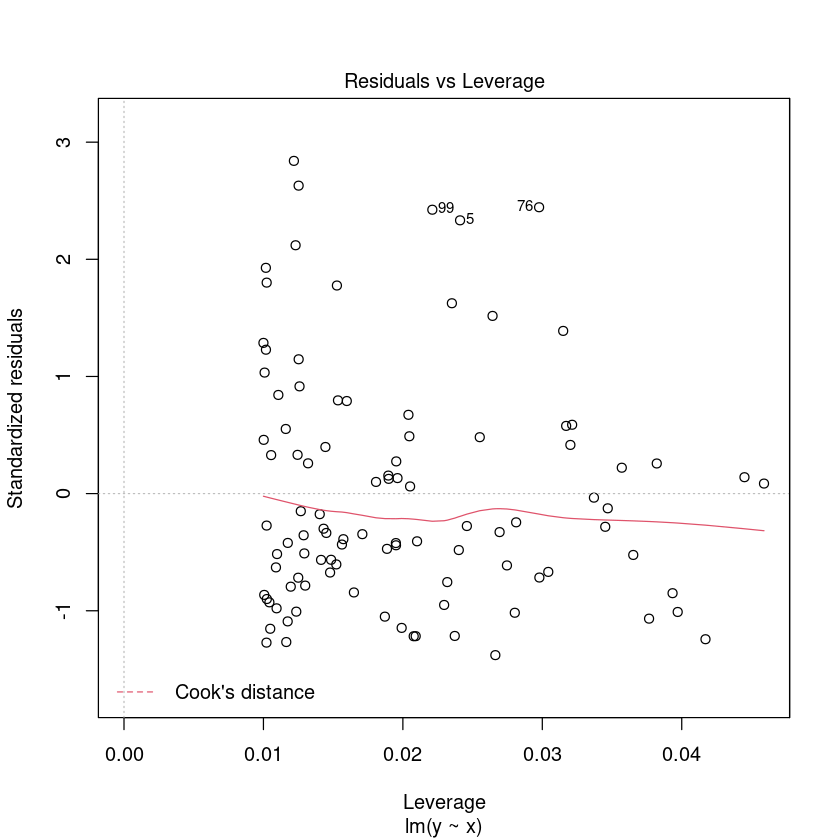

In [34]:
set.seed(1)
n <- 100
x <- runif(n, 1, 5)
y <- 3+5*x + rchisq(n,df=4)

summary(fit <- lm(y~x))
scatterplot(y ~ x)
plot(fit)

[1] 260 561

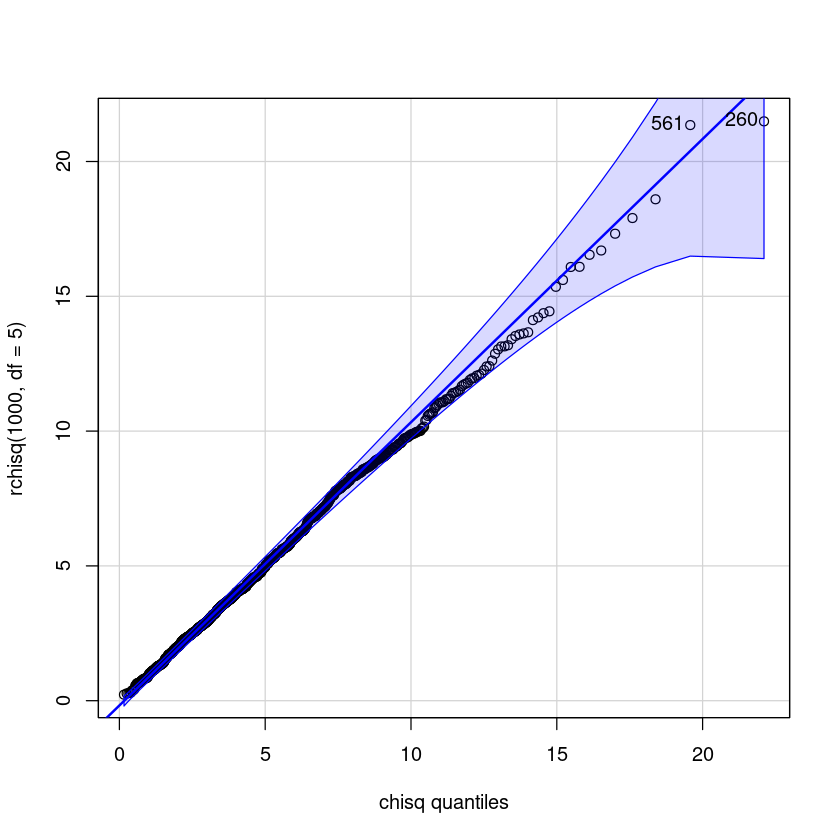

In [53]:
car::qqPlot(rchisq(1000,df=5),dist="chisq",df=5) #car::qqPlot(fit$res)

[1] 0.5454545

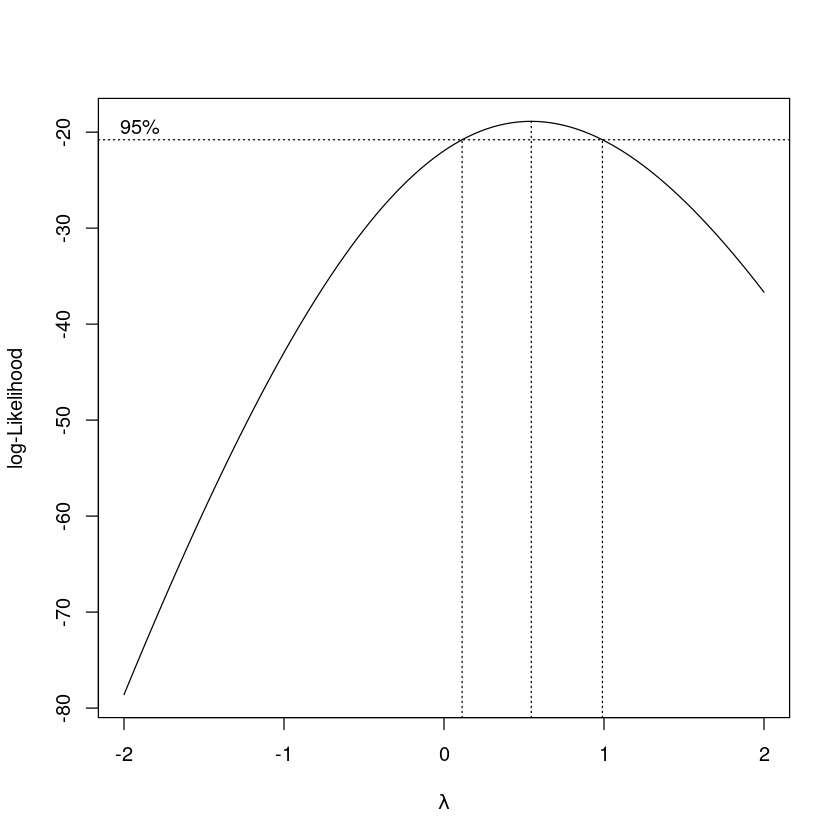

In [54]:
bc <- MASS::boxcox(fit)
(lambda <- bc$x[which.max(bc$y)])

In [57]:
summary(bc2<-car::powerTransform(fit,family="bcnPower"))

bcnPower transformation to Normality 

Estimated power, lambda
   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Y1    0.5441         0.5       0.1076       0.9806

Location gamma was fixed at its lower bound
   Est gamma Std Err. Wald Lower Bound Wald Upper Bound
Y1       0.1       NA               NA               NA

Likelihood ratio tests about transformation parameters
                           LRT df       pval
LR test, lambda = (0) 6.133644  1 0.01326332
LR test, lambda = (1) 4.011400  1 0.04519362


Call:
lm(formula = y.bc ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9805 -0.4598 -0.1801  0.3731  1.7349 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.07948    0.19419   21.01   <2e-16 ***
x            1.25055    0.05974   20.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6362 on 98 degrees of freedom
Multiple R-squared:  0.8173,	Adjusted R-squared:  0.8154 
F-statistic: 438.3 on 1 and 98 DF,  p-value: < 2.2e-16


[1] 14 93

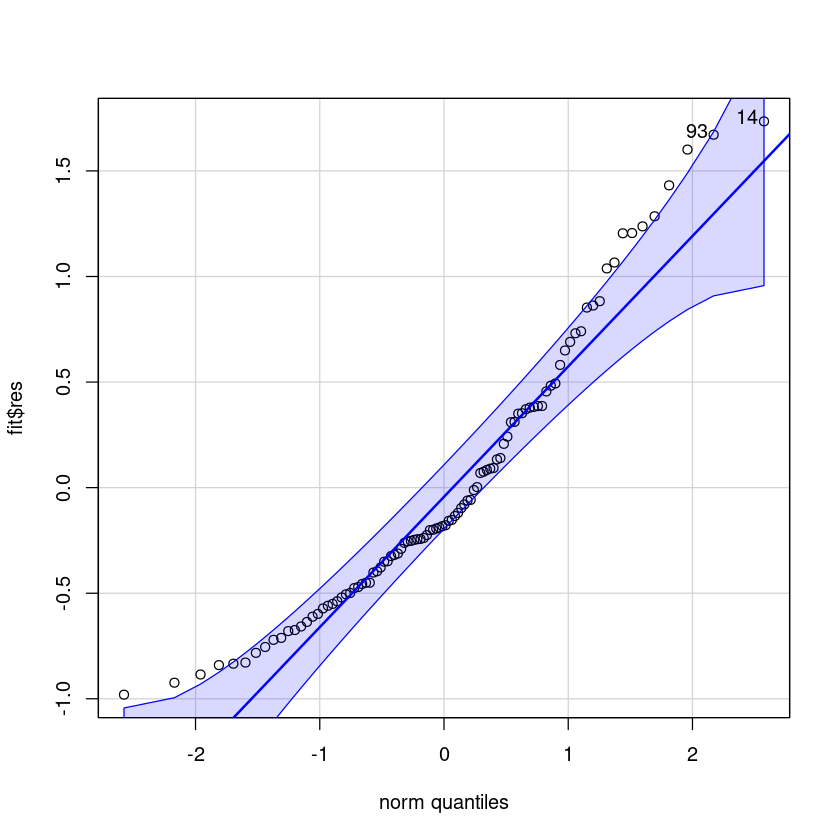

In [59]:
y.bc<-bcnPower(y,lambda=0.54,gamma=0.1)

summary(fit <- lm(y.bc~x))
car::qqPlot(fit$res)


Call:
lm(formula = y.bc ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9925 -0.4683 -0.1828  0.3797  1.7635 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.10124    0.19745   20.77   <2e-16 ***
x            1.27142    0.06074   20.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6469 on 98 degrees of freedom
Multiple R-squared:  0.8172,	Adjusted R-squared:  0.8153 
F-statistic: 438.1 on 1 and 98 DF,  p-value: < 2.2e-16


[1] 14 93

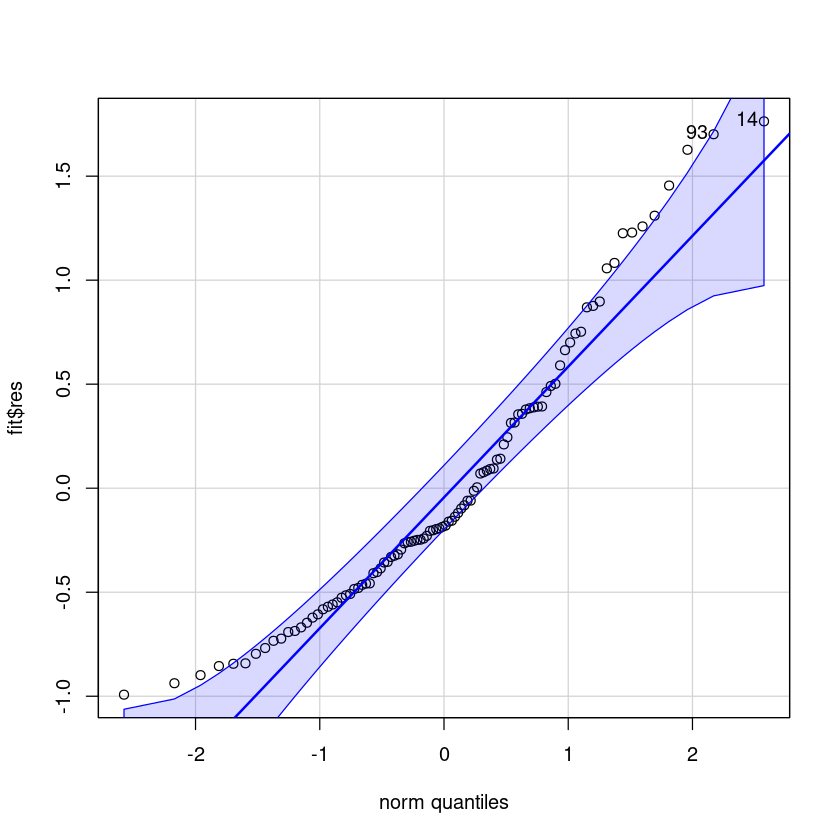

In [60]:
y.bc<-(y^(lambda)-1)/lambda

summary(fit <- lm(y.bc~x))
car::qqPlot(fit$res)

In [61]:
lambda

[1] 0.5454545

In [62]:
dados<-read_csv("/home/ffajardo/Dropbox/working_papers/Github/aulas/jupyter/datasets/salary.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  years = col_double(),
  salary = col_double()
)




In [63]:
head(dados)

years,salary
<dbl>,<dbl>
1,41504
1,32619
1,44322
2,40038
2,46147
2,38447


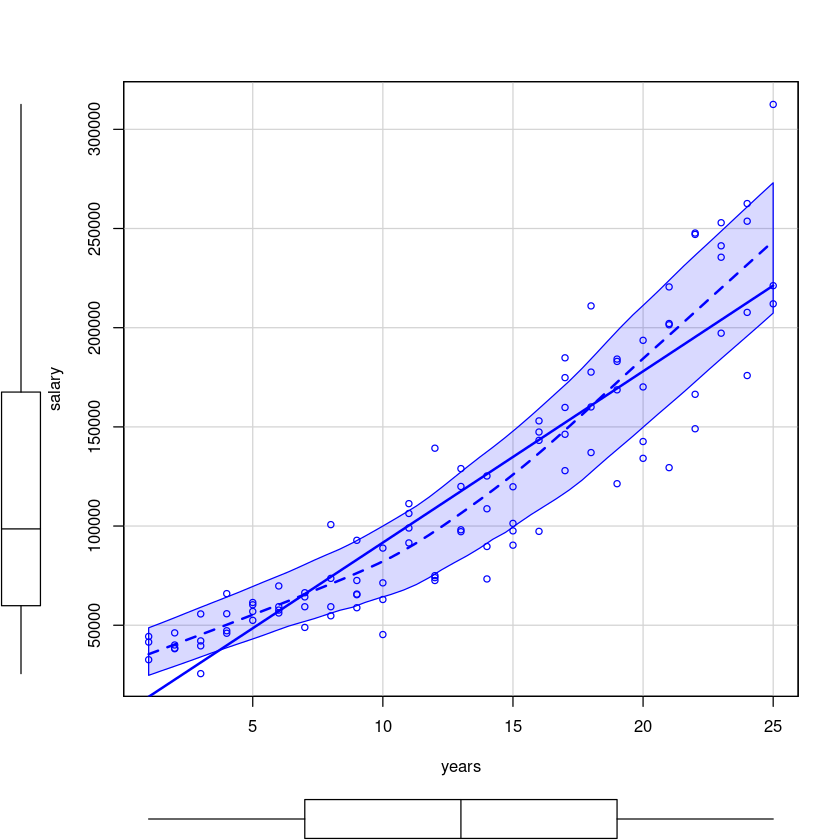

In [64]:
scatterplot(salary ~ .,data=dados)


Call:
lm(formula = salary ~ ., data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-57225 -18104    241  15589  91332 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5302       5750   0.922    0.359    
years           8637        389  22.200   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27360 on 98 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.8324 
F-statistic: 492.8 on 1 and 98 DF,  p-value: < 2.2e-16


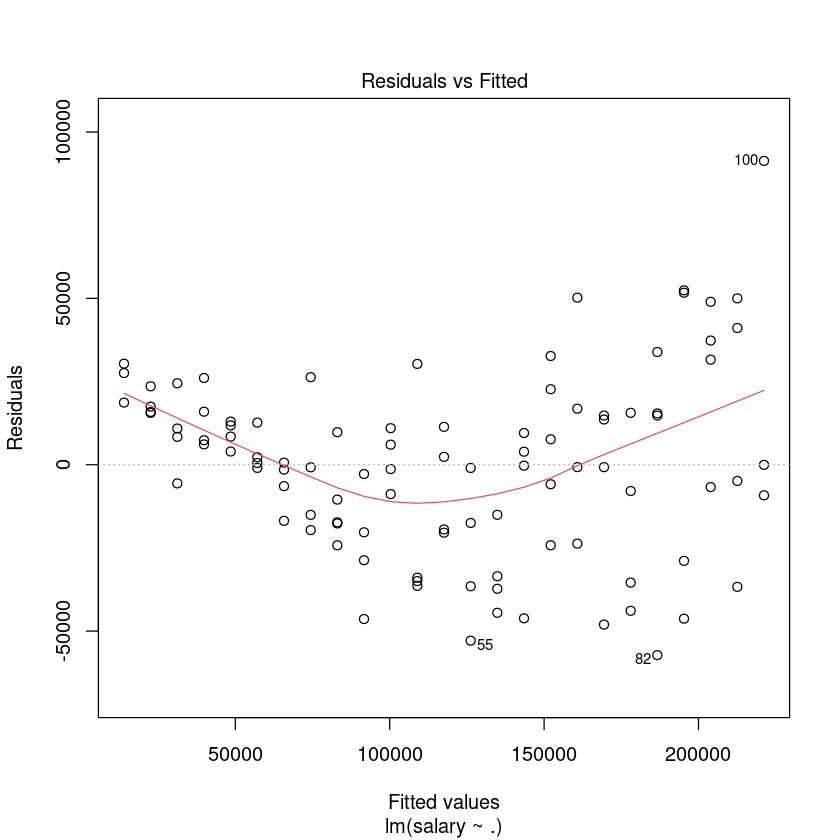

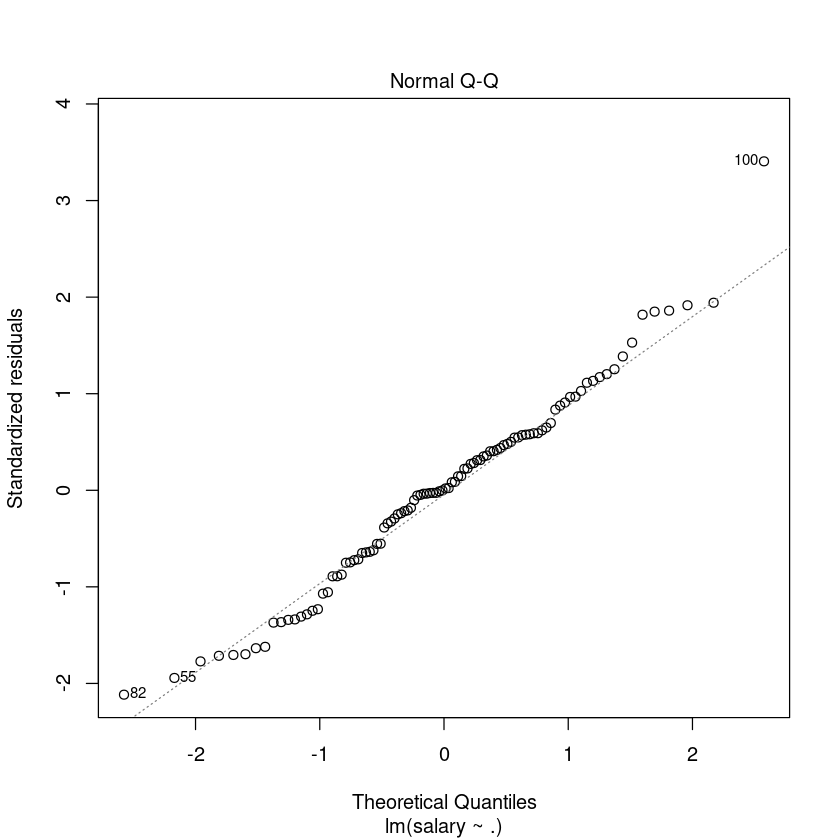

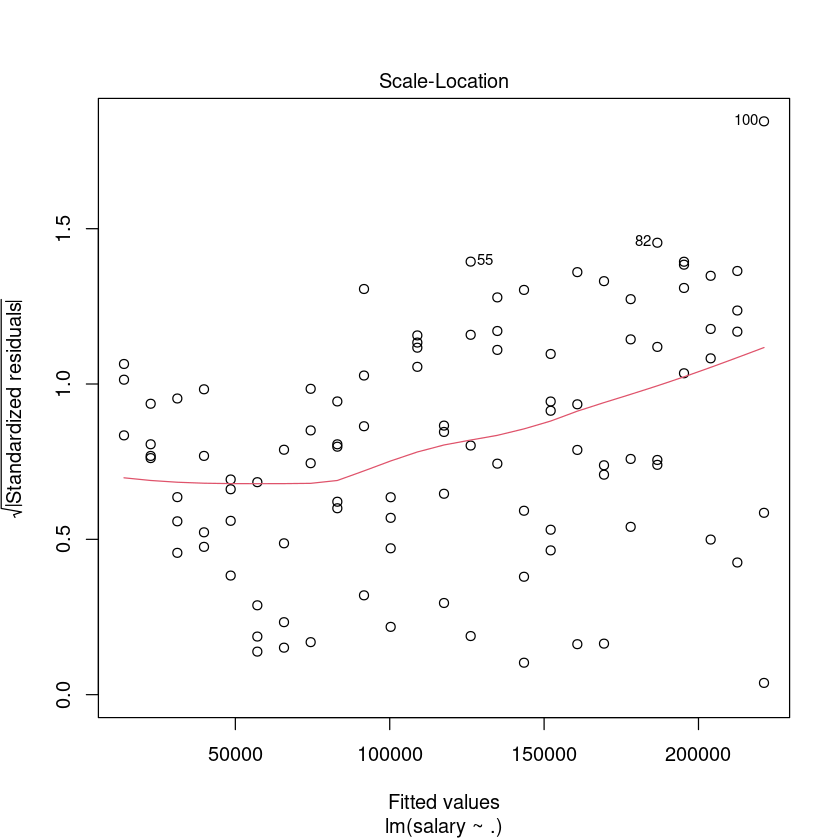

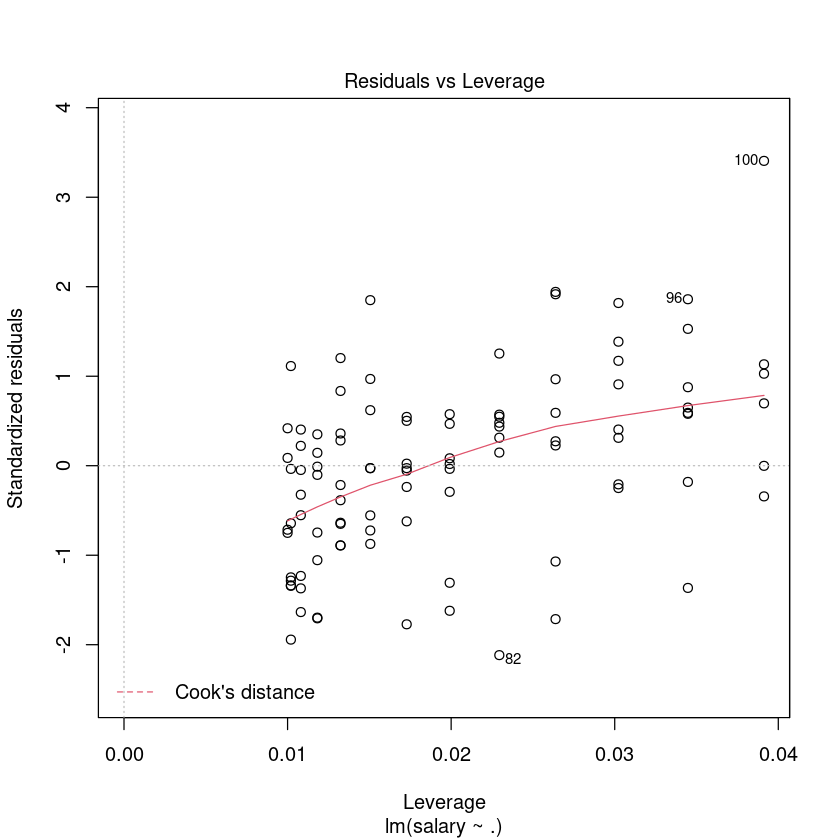

In [65]:
summary(fit <- lm(salary ~ .,data=dados))
plot(fit)

[1] 100  82

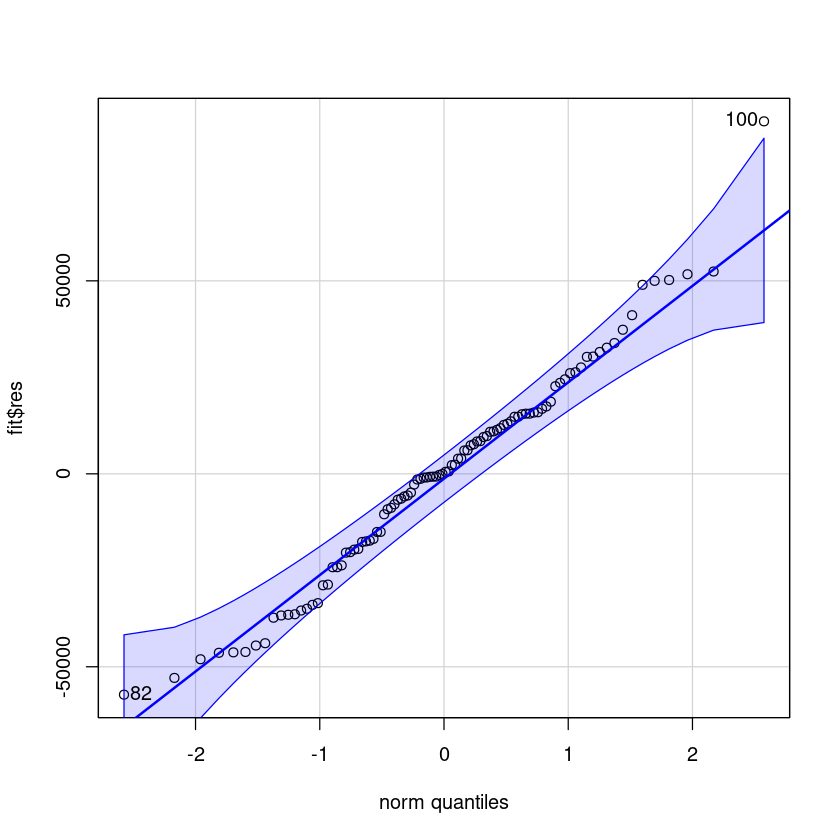

In [66]:
car::qqPlot(fit$res)

In [67]:
summary(bc2<-car::powerTransform(fit,family="bcPower"))

bcPower Transformation to Normality 
   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Y1     0.079           0      -0.1123       0.2702

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                           LRT df    pval
LR test, lambda = (0) 0.657834  1 0.41733

Likelihood ratio test that no transformation is needed
                           LRT df       pval
LR test, lambda = (1) 68.62577  1 < 2.22e-16


Call:
lm(formula = log(salary) ~ years, data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57022 -0.13560  0.03048  0.14157  0.41366 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.48381    0.04108  255.18   <2e-16 ***
years        0.07888    0.00278   28.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1955 on 98 degrees of freedom
Multiple R-squared:  0.8915,	Adjusted R-squared:  0.8904 
F-statistic: 805.2 on 1 and 98 DF,  p-value: < 2.2e-16


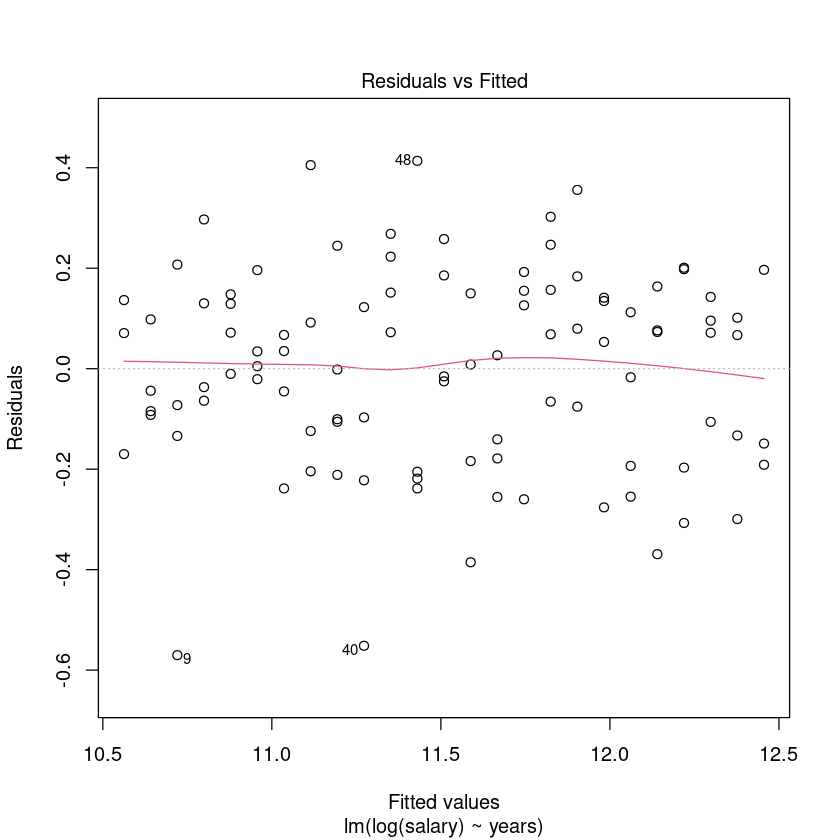

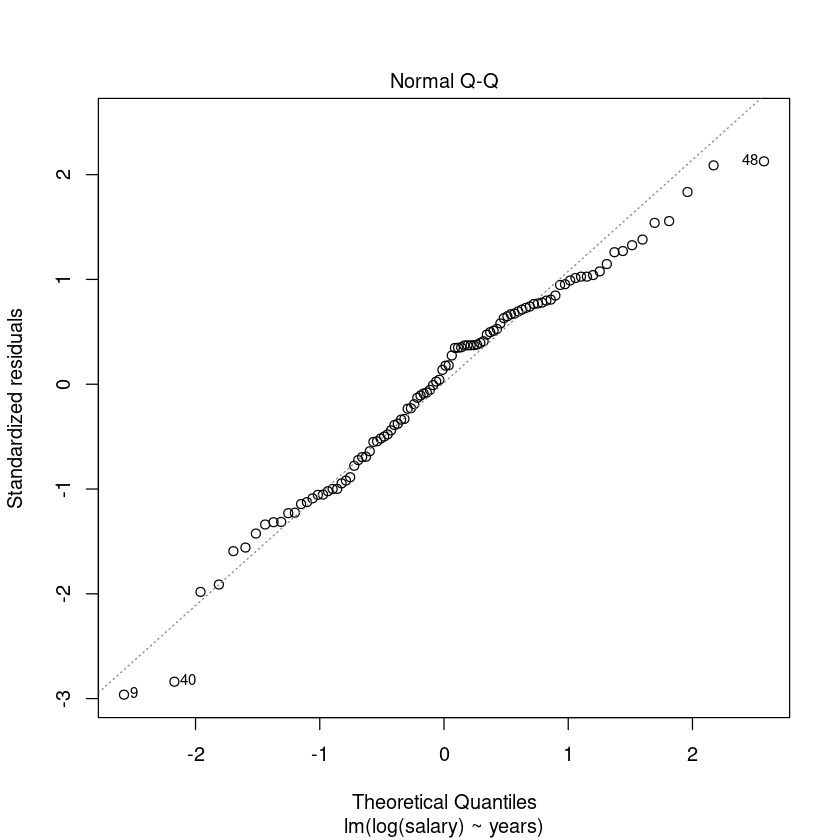

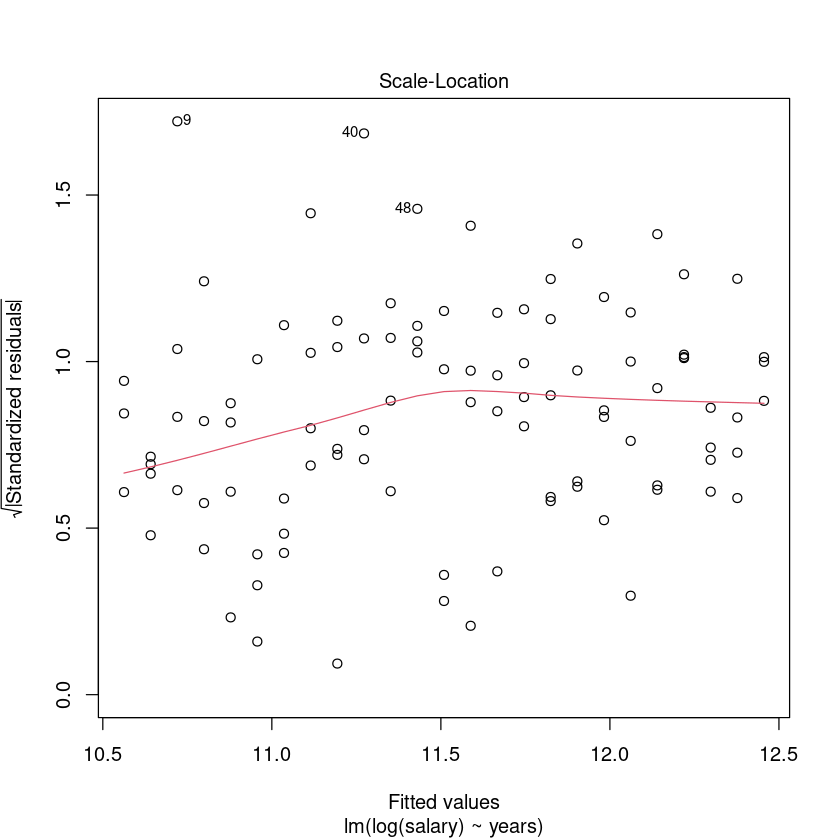

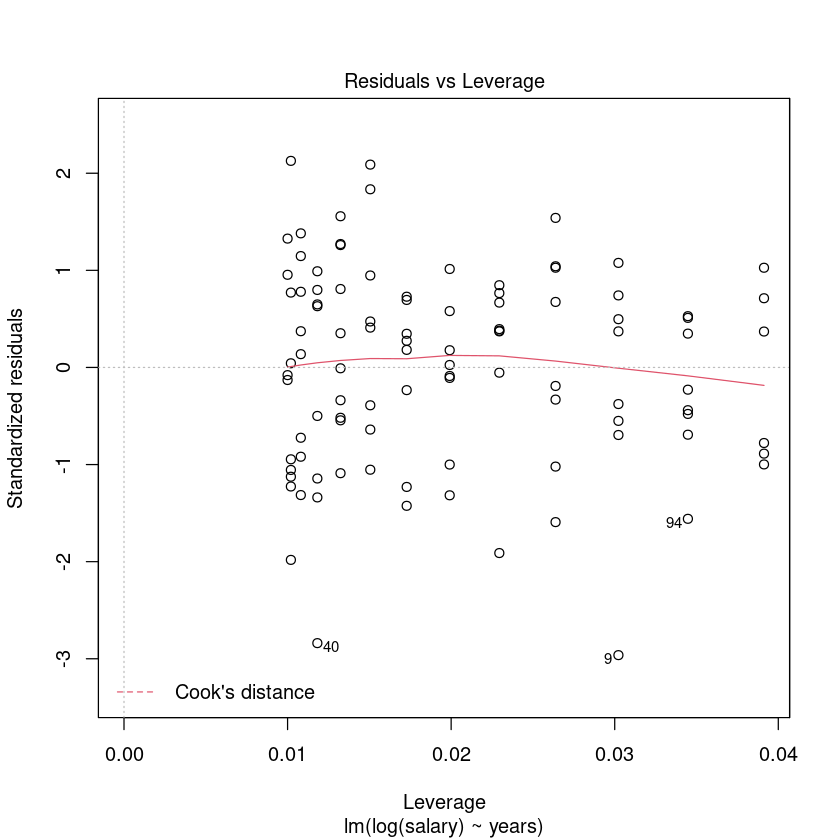

In [68]:
summary(fit.log <- lm(log(salary) ~ years, data = dados))
plot(fit.log)

[1]  9 40

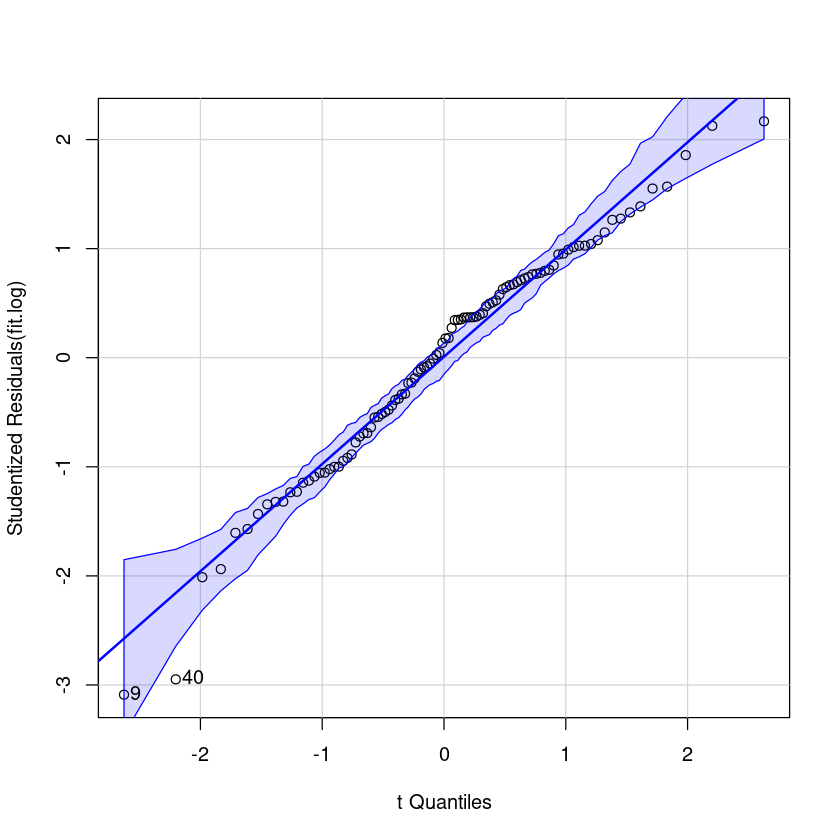

In [69]:
car::qqPlot(fit.log)

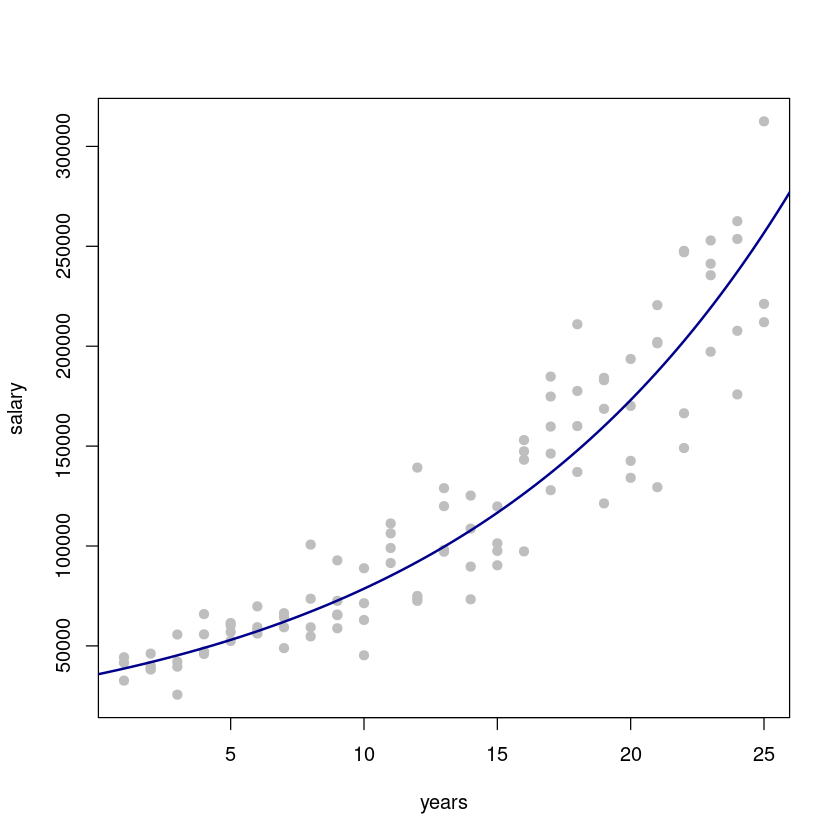

In [70]:
plot(salary ~ years, data = dados, col = "grey", pch = 20, cex = 1.5)
curve(exp(fit.log$coef[1] + fit.log$coef[2] * x),from = 0, to = 30, add = TRUE, col = "darkblue", lwd = 2)

In [71]:
summary(bc2<-car::powerTransform(fit,family="bcPower"))

bcPower Transformation to Normality 
   Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
Y1     0.079           0      -0.1123       0.2702

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                           LRT df    pval
LR test, lambda = (0) 0.657834  1 0.41733

Likelihood ratio test that no transformation is needed
                           LRT df       pval
LR test, lambda = (1) 68.62577  1 < 2.22e-16